In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import randint
import os

In [2]:
CS_fol = 'gt'
est_fol = 'read_counting'

CS_fol_lst = os.listdir(CS_fol)
est_fol_lst = os.listdir(est_fol)

if '.DS_Store' in est_fol_lst:
    est_fol_lst.remove('.DS_Store')
    
if '.ipynb_checkpoints' in est_fol_lst:
    est_fol_lst.remove('.ipynb_checkpoints')
    
if '.DS_Store' in CS_fol_lst:
    CS_fol_lst.remove('.DS_Store')
    
if '.ipynb_checkpoints' in CS_fol_lst:
    CS_fol_lst.remove('.ipynb_checkpoints')

CS_files = []
for file in CS_fol_lst:
    CS_files.append(CS_fol + '/' + file)
    
est_files = []
for file in est_fol_lst:
    est_files.append(est_fol + '/' + file)

print(CS_files, est_files)

pearson_file = 'CS_corr/pearson.txt'
spearman_file = 'CS_corr/spearman.txt'

p_data = pd.read_csv(pearson_file, sep='\t', index_col=0)
s_data = pd.read_csv(spearman_file, sep='\t', index_col=0)

df_p = pd.DataFrame(p_data)
df_s = pd.DataFrame(s_data)

outfol = 'correlation_plots'
os.mkdir(outfol)

['gt/CSx_some.txt'] ['read_counting/BL14_atleast.2_top-1_singleCpG_final_assignedref_uniq.txt_result_nocov_mincpg3_ABSreadcount_divisioned.txt_CSxOut.txt']


In [3]:
est_cells = ['nB', 'NK', 'mNeu', 'DC']
CS_cells = ['nB', 'NK', 'mNeu', 'DC']

In [4]:
def get_cell_vals(cell, df):
    split = cell.split('/')
    val = np.zeros(len(np.array(df[split[0]])))
    for i in range(len(split)):
        val += np.array(df[split[i]])
    return val

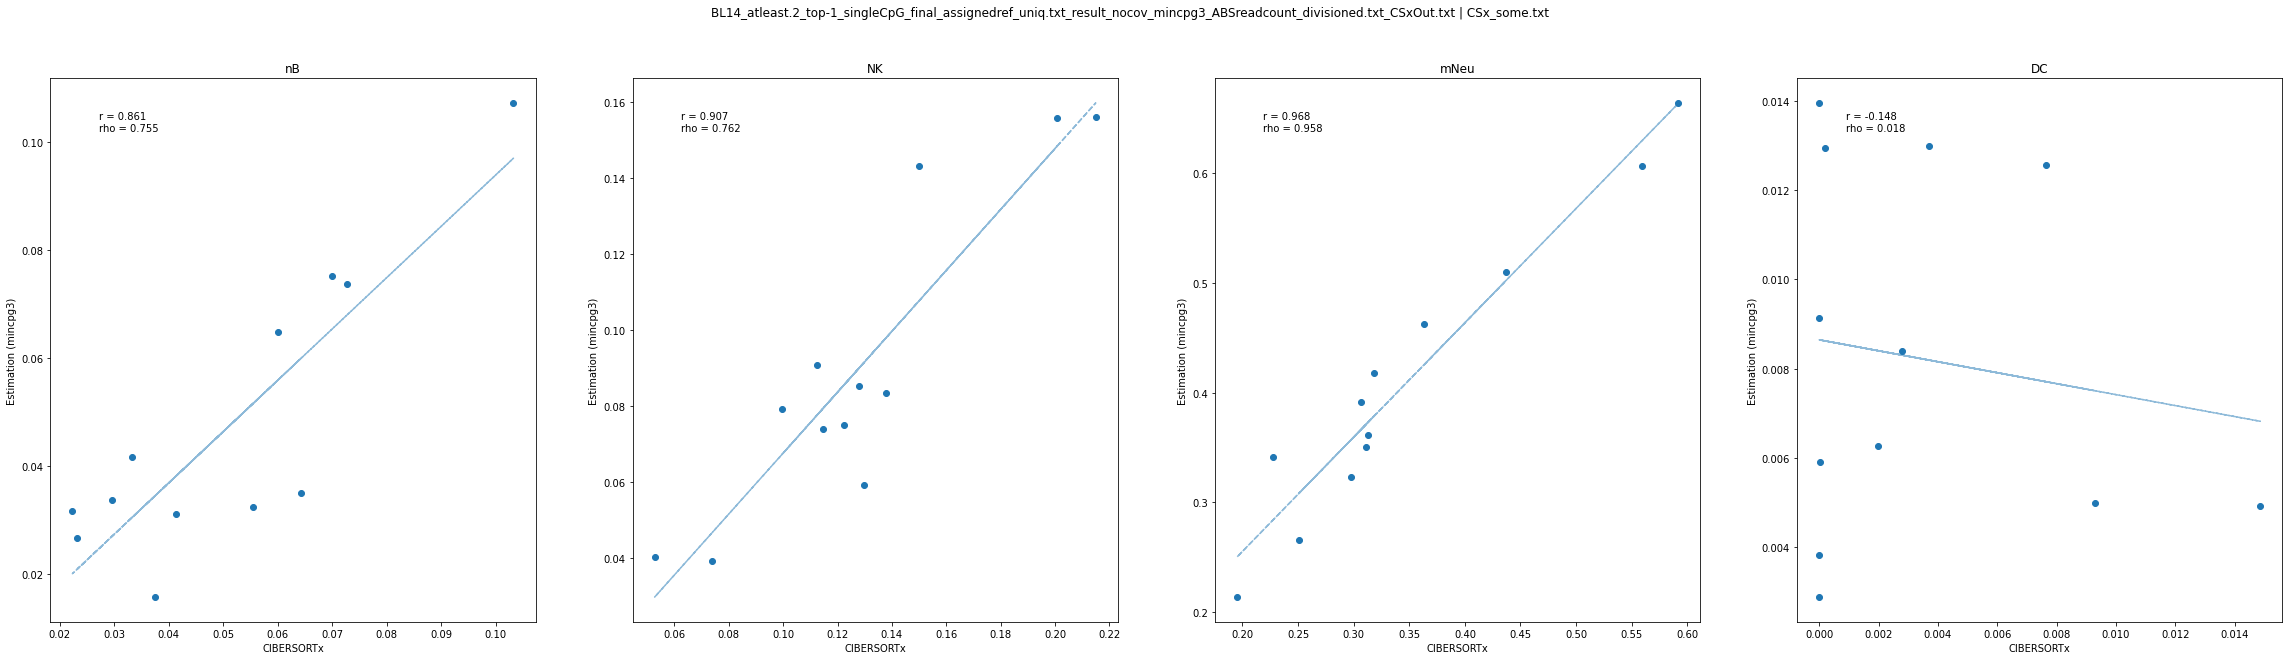

In [5]:
for k in range(len(CS_files)):
    CS_data = pd.read_csv(CS_files[k], sep='\t', index_col=0)
    df_CS = pd.DataFrame(CS_data)
    df_CS = df_CS.sort_index()
    for j in range(len(est_files)):
        fig, axs = plt.subplots(1, len(est_cells), figsize=(10 * len(est_cells), 10))
        est_data = pd.read_csv(est_files[j], sep='\t', index_col=0)
        df_est = pd.DataFrame(est_data)
        df_est = df_est.sort_index()
        for i in range(len(est_cells)):
            est_arr = get_cell_vals(est_cells[i], df_est)
            CS_arr = get_cell_vals(CS_cells[i], df_CS)
            m, b = np.polyfit(CS_arr, est_arr, 1)
            axs[i].scatter(CS_arr, est_arr)
            axs[i].plot(CS_arr, m*CS_arr + b, '--', alpha=0.5)
            axs[i].set_title(est_cells[i])
            axs[i].set_xlabel('CIBERSORTx')
            axs[i].set_ylabel('Estimation (' + est_files[j].split('_')[-4] + ')')
            corr_col = ''
            for col in list(df_p.columns):
                if est_cells[i] in col:
                    corr_col = col
            p_corr = np.around(float(df_p[(df_p.index == est_files[j].split('/')[1])][corr_col]), decimals=3)
            s_corr = np.around(float(df_s[(df_s.index == est_files[j].split('/')[1])][corr_col]), decimals=3)
            xy = (0.1, 0.1)
            axs[i].text(0.1, 0.9, 'r = ' + str(p_corr) + '\nrho = ' + str(s_corr), horizontalalignment='left', verticalalignment='bottom', transform=axs[i].transAxes)
    
        fig.suptitle(est_files[j].split('/')[1] + ' | ' + CS_files[k].split('/')[1])
        plt.savefig(outfol + '/' + est_files[j].split('/')[1] + '_' + CS_files[k].split('/')[1] + '_figure_separate_cell.pdf', dpi=300, bbox_inches='tight')
        
        
        
        

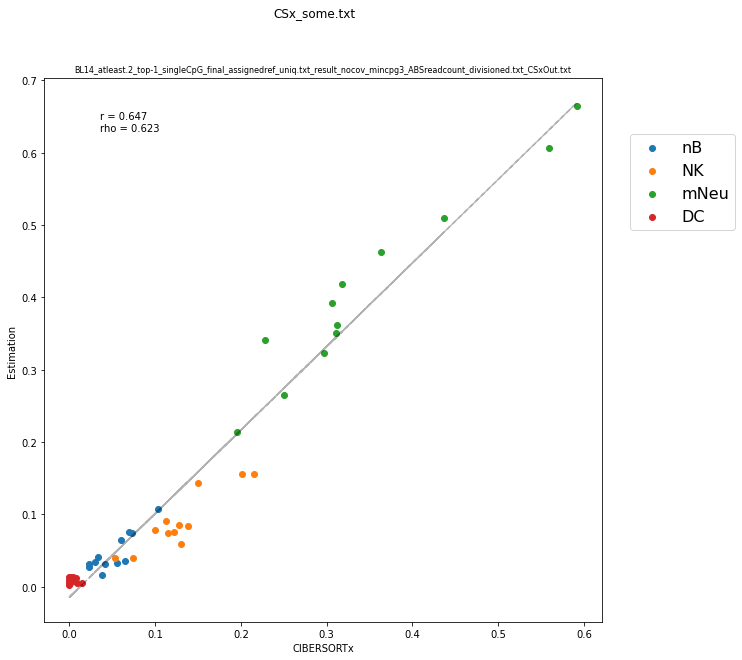

In [6]:
for k in range(len(CS_files)):
    fig, axs = plt.subplots(1, len(est_files), figsize=(10 * len(est_files), 10))
    CS_data = pd.read_csv(CS_files[k], sep='\t', index_col=0)
    df_CS = pd.DataFrame(CS_data)
    df_CS = df_CS.sort_index()
    for j in range(len(est_files)):
        est_data = pd.read_csv(est_files[j], sep='\t', index_col=0)
        df_est = pd.DataFrame(est_data)
        df_est = df_est.sort_index()
        diag_arr = np.array([])
        est_tot_arr = np.array([])
        p_arr = np.zeros(len(est_cells))
        s_arr = np.zeros(len(est_cells))
        for i in range(len(est_cells)):
            est_arr = get_cell_vals(est_cells[i], df_est)
            CS_arr = get_cell_vals(CS_cells[i], df_CS)
            m, b = np.polyfit(CS_arr, est_arr, 1)
            if len(est_files) == 1:
                axs.scatter(CS_arr, est_arr, label=est_cells[i])
            else:
                axs[j].scatter(CS_arr, est_arr, label=est_cells[i])
            diag_arr = np.concatenate((diag_arr, CS_arr), axis=None)
            est_tot_arr = np.concatenate((est_tot_arr, est_arr))
            corr_col = ''
            for col in list(df_p.columns):
                if est_cells[i] in col:
                    corr_col = col
            p_corr = float(df_p[(df_p.index == est_files[j].split('/')[1])][corr_col])
            s_corr = float(df_s[(df_s.index == est_files[j].split('/')[1])][corr_col])
            p_arr[i] = p_corr
            s_arr[i] = s_corr
        p_corr_mean = np.around(np.mean(p_arr), decimals=3)
        s_corr_mean = np.around(np.mean(s_arr), decimals=3)
        m, b = np.polyfit(diag_arr, est_tot_arr, 1)
        if len(est_files) == 1:
            axs.plot(diag_arr, m*diag_arr + b, '--', alpha=0.3, c='k')
            axs.text(0.1, 0.9, 'r = ' + str(p_corr_mean) + '\nrho = ' + str(s_corr_mean), horizontalalignment='left', verticalalignment='bottom', transform=axs.transAxes)
            axs.set_title(est_files[j].split('/')[1], fontsize=8)
            axs.set_xlabel('CIBERSORTx')
            axs.set_ylabel('Estimation')
        else:
            axs[j].plot(diag_arr, m*diag_arr + b, '--', alpha=0.3, c='k')
            axs[j].text(0.1, 0.9, 'r = ' + str(p_corr_mean) + '\nrho = ' + str(s_corr_mean), horizontalalignment='left', verticalalignment='bottom', transform=axs[j].transAxes)
            axs[j].set_title(est_files[j].split('/')[1], fontsize=8)
            axs[j].set_xlabel('CIBERSORTx')
            axs[j].set_ylabel('Estimation')
        plt.legend(loc=(1.05,0.72), fontsize=16)
    
    fig.suptitle(CS_files[k].split('/')[1])
    plt.savefig(outfol + '/' + est_files[j].split('/')[1] + '_' + CS_files[k].split('/')[1] + '_figure_combined_cell.pdf', dpi=300, bbox_inches='tight')